In [1]:
# Import Libraries
import geopandas as gpd
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus'] = False

In [2]:
# Import data 
tor_nbs = gpd.read_file('tor_nbs.gpkg')
print (tor_nbs.shape) # Print the sample number and feature column number of the dataset
tor_nbs.head() # Display the first five rows of data

(140, 5)


,_id,Hood_ID,Neighbourhood,Pop,geometry
0,1,93,Dovercourt-Wallace Emerson-Junction,36625,"POLYGON ((-79.41842 43.66358, -79.41887 43.663..."
1,2,121,Oakridge,13845,"POLYGON ((-79.26986 43.69584, -79.27009 43.695..."
2,3,110,Keelesdale-Eglinton West,11058,"POLYGON ((-79.47242 43.67922, -79.47277 43.679..."
3,4,108,Briar Hill-Belgravia,14257,"POLYGON ((-79.46462 43.69216, -79.46473 43.692..."
4,5,45,Parkwoods-Donalda,34805,"POLYGON ((-79.33055 43.73979, -79.33065 43.739..."


In [3]:
# Import data 
crimeData = pd.read_csv('crimeData.csv')
print (crimeData.shape) # Print the sample number and feature column number of the dataset
crimeData.head() #  Display the first five rows of data

(276793, 9)


,occurrencedate,premises_type,MCI,Hood_ID,Neighbourhood,ObjectId,geometry,lockdownNum,lockdownBinary
0,2014-03-02 05:00:00,House,Assault,1,West Humber-Clairville,1,POINT (-79.59033164 43.73401277),NONE,0
1,2013-12-24 05:00:00,Commercial,Robbery,1,West Humber-Clairville,2,POINT (-79.60070124000001 43.73183406),NONE,0
2,2013-01-05 05:00:00,Commercial,Assault,1,West Humber-Clairville,3,POINT (-79.60079352 43.68642313),NONE,0
3,2013-12-31 05:00:00,Commercial,Break and Enter,1,West Humber-Clairville,4,POINT (-79.60387564 43.74364194),NONE,0
4,2014-01-03 05:00:00,Commercial,Break and Enter,1,West Humber-Clairville,5,POINT (-79.58644259 43.69710833),NONE,0


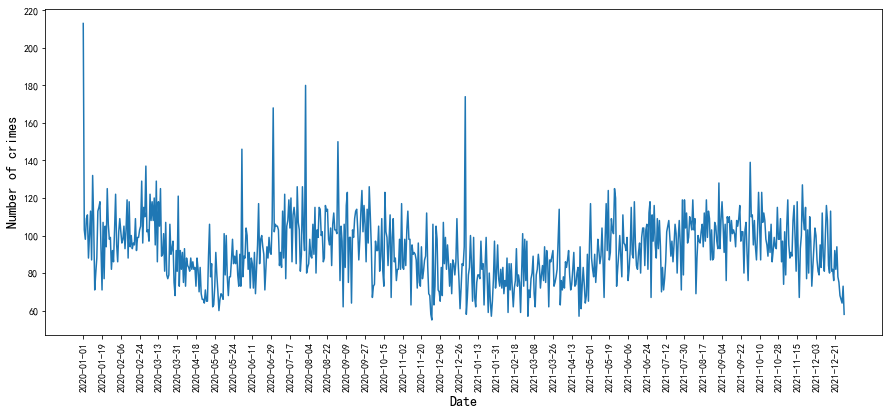

In [4]:
# Plot the number of crimes over time
crimeData_0 = crimeData # Create a new dataframe
#Get the year, month and date of crime events
crimeData_0['occurrencedate'] = [i.split(' ')[0] for i in crimeData_0['occurrencedate'].tolist()]
# Sets the date in string format to datetime format
crimeData_0['new_occurrencedate'] = pd.to_datetime(crimeData_0['occurrencedate'])

# Time slice selects data. Users can set the start time and end time as required
start = datetime.strptime('2020-01-01', '%Y-%m-%d')
end = datetime.strptime('2021-12-30', '%Y-%m-%d')

# Slice the data according to time conditions
crimeData_0_new = crimeData_0[(crimeData_0['new_occurrencedate'] >= start) & (crimeData_0['new_occurrencedate'] <= end)]
#display(crimeData_0_new)

# The user specifies the region name. If no region is specified, all regions are displayed
area_input = ''
# area_input = '' # on region is specified

# Users specifie a crime type. If no crime type is specified, all crime types are displayed
type_input = ''
# type_input = '' # on crime type is specified

# Determine areas
if area_input == '':
    crimeData_0_new_area = crimeData_0_new
else:
    crimeData_0_new_area = crimeData_0_new.loc[crimeData_0_new['Neighbourhood'] == area_input]
#display(crimeData_0_new_area)

# Deterimine crime type
if type_input == '':
    crimeData_0_new_area_type = crimeData_0_new_area
else:
    crimeData_0_new_area_type = crimeData_0_new_area.loc[crimeData_0_new_area['MCI'] == type_input]
#display(crimeData_0_new_area_type)

date_count = crimeData_0_new_area_type['occurrencedate'].value_counts() # To do statistical analysis of the number of crimes per day
dates = date_count.index.tolist() # get all date information 
counts = date_count.tolist() # Get the daily corresponding number of crimes
dic = dict(zip(dates, counts)) # Create dictionary
res = sorted(dic.items(), key = lambda dic:dic[0], reverse = False) # Sort dictionaries by year

# Plot a bar chart showes the number of crimes per year
x = []
y = []
for i in res:
    x.append(i[0]) # get x
    y.append(i[1]) # get y
plt.figure(figsize = (15, 6))
plt.plot(x, y) # polt bar chart
plt.xlabel('Date', fontsize = 14) # Set the X-axis label
plt.ylabel('Number of crimes', fontsize = 14) # Set the Y-axis label
if int(len(x)/40) == 0:
    pass
else:
    plt.xticks(x[::int(len(x)/40)])
plt.xticks(rotation = 90) # X scale, rotated 60 degrees
plt.show()

In [5]:
# read data
covidData = pd.read_csv('covidData.csv')
print (covidData.shape) # Print the sample number and feature column number of the dataset
covidData.head() # Display the first five rows of data

(772, 2)


,ReportedDate,CasesPerDay
0,2021-12-31,4315
1,2021-12-30,4300
2,2021-12-29,4009
3,2022-01-01,3475
4,2021-12-28,3370


In [6]:
# Calculate the crime rate for each region and put it in a new Dataframe, along with other relevant characteristic column data
data = tor_nbs[['Hood_ID', 'Neighbourhood', 'Pop']] # Read the relevant data from tor_nbs data
data.sort_values(by = "Hood_ID", inplace = True, ascending = True) # Sort dataframe by Hood_ID column in ascending order
data.reset_index(drop = True, inplace = True) # Reset the index of the dataframe
data['Crime_num'] = [None]*(data.index[-1] + 1) # Create a new column to store the number of crimes in each region
data # Show data

,Hood_ID,Neighbourhood,Pop,Crime_num
0,1,West Humber-Clairville,33312,None
1,2,Mount Olive-Silverstone-Jamestown,32954,None
2,3,Thistletown-Beaumond Heights,10360,None
3,4,Rexdale-Kipling,10529,None
4,5,Elms-Old Rexdale,9456,None
...,...,...,...,...
135,136,West Hill,27392,None
136,137,Woburn,53485,None
137,138,Eglinton East,22776,None
138,139,Scarborough Village,16724,None


In [7]:
# According to the data in crimedata.csv, statistics the number of crimes in each region
counts_Hood = crimeData['Neighbourhood'].value_counts() # Neighbourhood column in crime data is counted
counts_Hood_name = counts_Hood.index.tolist() # Get region name
counts_Hood_count = counts_Hood.values.tolist() # Get the number of crimes in the region
for i in range(len(counts_Hood_name)): 
    for j in data.index: 
        if counts_Hood_name[i] == data['Neighbourhood'][j]: # Determine the locale name of the two files is same
            data['Crime_num'][j] = counts_Hood_count[i]     # Add the number of crimes in each region to the new column

data # show dataframe

,Hood_ID,Neighbourhood,Pop,Crime_num
0,1,West Humber-Clairville,33312,7493
1,2,Mount Olive-Silverstone-Jamestown,32954,3341
2,3,Thistletown-Beaumond Heights,10360,979
3,4,Rexdale-Kipling,10529,1070
4,5,Elms-Old Rexdale,9456,879
...,...,...,...,...
135,136,West Hill,27392,4525
136,137,Woburn,53485,5001
137,138,Eglinton East,22776,2439
138,139,Scarborough Village,16724,1973


In [8]:
# Calculate the crime rate for each area
data['Crime_ratio'] = data['Crime_num']/data['Pop']
data 

,Hood_ID,Neighbourhood,Pop,Crime_num,Crime_ratio
0,1,West Humber-Clairville,33312,7493,0.224934
1,2,Mount Olive-Silverstone-Jamestown,32954,3341,0.101384
2,3,Thistletown-Beaumond Heights,10360,979,0.0944981
3,4,Rexdale-Kipling,10529,1070,0.101624
4,5,Elms-Old Rexdale,9456,879,0.0929569
...,...,...,...,...,...
135,136,West Hill,27392,4525,0.165194
136,137,Woburn,53485,5001,0.0935029
137,138,Eglinton East,22776,2439,0.107086
138,139,Scarborough Village,16724,1973,0.117974


In [9]:
# Count the number of crimes reported after the outbreak, which began on January 23, 2020, according to COVID-19 Data.
crimeData_1 = crimeData
# Crime data is processed as long as the data is from January 23, 2020
# Sets the date in string format to datetime format
crimeData_1['new_occurrencedate'] = pd.to_datetime(crimeData_1['occurrencedate'])
# Time slice selected data, select data after 2020-01-23
start = datetime.strptime('2020-01-23', '%Y-%m-%d')
#Slice the data according to the conditions
crimeData_1_covid = crimeData_1[(crimeData_1['new_occurrencedate'] >= start)]
crimeData_1_covid

,occurrencedate,premises_type,MCI,Hood_ID,Neighbourhood,ObjectId,geometry,lockdownNum,lockdownBinary,new_occurrencedate
3199,2020-06-26,Outside,Assault,1,West Humber-Clairville,3201,POINT (-79.59856852 43.74149589),ONE,1,2020-06-26
3200,2020-06-27,Commercial,Assault,1,West Humber-Clairville,3202,POINT (-79.61688986 43.72375357),ONE,1,2020-06-27
3201,2020-06-17,Apartment,Break and Enter,1,West Humber-Clairville,3203,POINT (-79.6031677 43.73198494),ONE,1,2020-06-17
3202,2020-06-27,Commercial,Assault,1,West Humber-Clairville,3204,POINT (-79.60316163 43.73413577),ONE,1,2020-06-27
3203,2020-06-27,Commercial,Assault,1,West Humber-Clairville,3205,POINT (-79.60316163 43.73413577),ONE,1,2020-06-27
...,...,...,...,...,...,...,...,...,...,...
276788,2021-07-28,Outside,Auto Theft,140,Guildwood,277182,POINT (-79.19789345 43.74434203),NONE,0,2021-07-28
276789,2021-09-27,House,Auto Theft,140,Guildwood,277183,POINT (-79.17880312 43.75624362),NONE,0,2021-09-27
276790,2021-11-03,House,Auto Theft,140,Guildwood,277184,POINT (-79.20301402 43.7447065),NONE,0,2021-11-03
276791,2021-11-19,Commercial,Auto Theft,140,Guildwood,277185,POINT (-79.2008439 43.75133476),NONE,0,2021-11-19


In [10]:
data['Crime_num_covid'] = [None]*(data.index[-1] + 1) # Create a new column to store the number of crimes committed during the outbreak for each region
# According to the data in Crimedata.csv, the number of criminal cases during the epidemic in each region was counted
counts_Hood_covid = crimeData_1_covid['Neighbourhood'].value_counts() # Neighbourhood column in crimeData_1_covid is counted
counts_Hood_name_covid = counts_Hood_covid.index.tolist() # Get region name
counts_Hood_count_covid = counts_Hood_covid.values.tolist() # Get the number of crimes in the area
for i in range(len(counts_Hood_name_covid)): 
    for j in data.index: 
        if counts_Hood_name_covid[i] == data['Neighbourhood'][j]: # Determine that two files have the same locale name
            data['Crime_num_covid'][j] = counts_Hood_count_covid[i]     # Add the number of crimes in each region to the new column

data # Show dataframe

,Hood_ID,Neighbourhood,Pop,Crime_num,Crime_ratio,Crime_num_covid
0,1,West Humber-Clairville,33312,7493,0.224934,1737
1,2,Mount Olive-Silverstone-Jamestown,32954,3341,0.101384,668
2,3,Thistletown-Beaumond Heights,10360,979,0.0944981,228
3,4,Rexdale-Kipling,10529,1070,0.101624,241
4,5,Elms-Old Rexdale,9456,879,0.0929569,231
...,...,...,...,...,...,...
135,136,West Hill,27392,4525,0.165194,943
136,137,Woburn,53485,5001,0.0935029,1071
137,138,Eglinton East,22776,2439,0.107086,452
138,139,Scarborough Village,16724,1973,0.117974,407


In [11]:
# Finding out the proportion of crimes in all cases counted during the epidemic in each region
data['Crime_weight_covid'] = data['Crime_num_covid']/data['Crime_num']
data

,Hood_ID,Neighbourhood,Pop,Crime_num,Crime_ratio,Crime_num_covid,Crime_weight_covid
0,1,West Humber-Clairville,33312,7493,0.224934,1737,0.231816
1,2,Mount Olive-Silverstone-Jamestown,32954,3341,0.101384,668,0.19994
2,3,Thistletown-Beaumond Heights,10360,979,0.0944981,228,0.232891
3,4,Rexdale-Kipling,10529,1070,0.101624,241,0.225234
4,5,Elms-Old Rexdale,9456,879,0.0929569,231,0.262799
...,...,...,...,...,...,...,...
135,136,West Hill,27392,4525,0.165194,943,0.208398
136,137,Woburn,53485,5001,0.0935029,1071,0.214157
137,138,Eglinton East,22776,2439,0.107086,452,0.185322
138,139,Scarborough Village,16724,1973,0.117974,407,0.206285


In [12]:
# Lockdown counts the number of lockdown units available in each region
lockdown_num = [] # Create an empty matrix to store the number of times each region has been available in lockdown
for i in data['Neighbourhood'].tolist(): 
    temp = 0 
    for j in crimeData_1.index: 
        if i == crimeData_1['Neighbourhood'][j]: 
            if crimeData_1['lockdownBinary'][j] != 0:
                temp = temp + 1
    lockdown_num.append(temp)
data['lockdown_num'] = lockdown_num
data

,Hood_ID,Neighbourhood,Pop,Crime_num,Crime_ratio,Crime_num_covid,Crime_weight_covid,lockdown_num
0,1,West Humber-Clairville,33312,7493,0.224934,1737,0.231816,601
1,2,Mount Olive-Silverstone-Jamestown,32954,3341,0.101384,668,0.19994,221
2,3,Thistletown-Beaumond Heights,10360,979,0.0944981,228,0.232891,87
3,4,Rexdale-Kipling,10529,1070,0.101624,241,0.225234,90
4,5,Elms-Old Rexdale,9456,879,0.0929569,231,0.262799,76
...,...,...,...,...,...,...,...,...
135,136,West Hill,27392,4525,0.165194,943,0.208398,357
136,137,Woburn,53485,5001,0.0935029,1071,0.214157,367
137,138,Eglinton East,22776,2439,0.107086,452,0.185322,172
138,139,Scarborough Village,16724,1973,0.117974,407,0.206285,168


In [13]:
# Remove some data associated with duplicate column data
data_new = data[['Crime_ratio', 'Pop', 'Crime_weight_covid', 'lockdown_num']]

data_new['Crime_ratio'] = data_new['Crime_ratio'].astype('float64')
data_new['Crime_weight_covid'] = data_new['Crime_weight_covid'].astype('float64')
data_new

,Crime_ratio,Pop,Crime_weight_covid,lockdown_num
0,0.224934,33312,0.231816,601
1,0.101384,32954,0.199940,221
2,0.094498,10360,0.232891,87
3,0.101624,10529,0.225234,90
4,0.092957,9456,0.262799,76
...,...,...,...,...
135,0.165194,27392,0.208398,357
136,0.093503,53485,0.214157,367
137,0.107086,22776,0.185322,172
138,0.117974,16724,0.206285,168


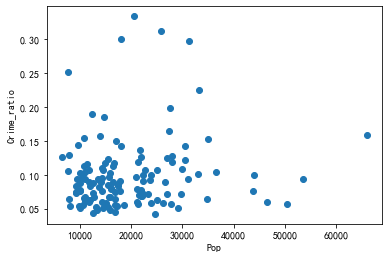

In [14]:
# Draw the scatter plot
plt.figure()
plt.scatter(data_new['Pop'], data_new['Crime_ratio'])
plt.xlabel('Pop')
plt.ylabel('Crime_ratio')
plt.show()

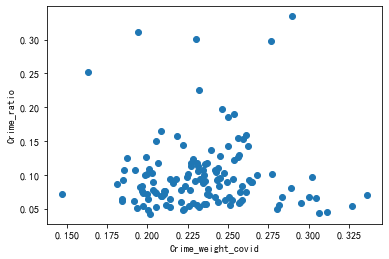

In [15]:
# Draw the scatter plot
plt.figure()
plt.scatter(data_new['Crime_weight_covid'], data_new['Crime_ratio'])
plt.xlabel('Crime_weight_covid')
plt.ylabel('Crime_ratio')
plt.show()

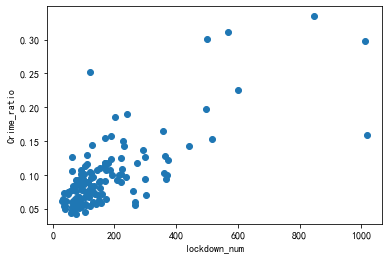

In [16]:
# Draw the scatter plot
plt.figure()
plt.scatter(data_new['lockdown_num'], data_new['Crime_ratio'])
plt.xlabel('lockdown_num')
plt.ylabel('Crime_ratio')
plt.show()

In [17]:
# View the correlation coefficient matrix
data_new.corr()

,Crime_ratio,Pop,Crime_weight_covid,lockdown_num
Crime_ratio,1.000000,0.133194,0.005206,0.734880
Pop,0.133194,1.000000,0.006321,0.586158
Crime_weight_covid,0.005206,0.006321,1.000000,0.210533
lockdown_num,0.734880,0.586158,0.210533,1.000000


In [18]:
data_new = data_new.dropna() # Delete null value

In [19]:
# This case selects Crime_ratio of different regions as dependent variable, Pop, Crime_weight_covid, lockdown_num as independent variable, and establishes logistic regression model
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
import numpy as np

# Get independent and dependent variables for machine learning
target = data_new.iloc[:, 0].values.reshape(-1, 1)
dataset = data_new.iloc[:, 1:].values 

In [20]:
# Divide test set and data set, avoid overfitting, verify set accounts for 20% of training set, and fix random state
X_train, X_test, y_train, y_test = train_test_split(dataset,
                                                    target,
                                                    test_size = 0.2,
                                                    random_state = 7)


In [21]:
# Because of the large span between different column data, data normalization is required
scale_x = StandardScaler()
scale_y = StandardScaler()
X_train = scale_x.fit_transform(X_train)
X_test = scale_x.transform(X_test)
y_train = scale_y.fit_transform(y_train)
y_test = scale_y.transform(y_test)

In [22]:
# Construct linear regression model, make prediction
Linear_model = LinearRegression() 
Linear_model.fit(X_train, y_train)   
y_pred_Linear = Linear_model.predict(X_test)


In [23]:
#Evaluate model
R2_Linear = r2_score(y_test, y_pred_Linear)
print("The R square score of the linear regression model on the test set is：  %.2f" % R2_Linear)

The R square score of the linear regression model on the test set is：  0.68


In [24]:
# Construct linear regression model, make prediction
DT_model = DecisionTreeRegressor(max_depth = 4, random_state = 7)
DT_model.fit(X_train, y_train) 
y_pred_DT = DT_model.predict(X_test)
#Evaluate model
R2_DT = r2_score(y_test, y_pred_DT)
print("The r-square score of the decision tree model on the test set is：  %.2f" % R2_DT)

The r-square score of the decision tree model on the test set is：  0.60


In [28]:
score =Linear_model.score(X_test,y_test)

y_pred =  Linear_model.predict(X_test)
 

In [29]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
MSE = mean_squared_error(y_test, y_pred)
RMSE = mean_squared_error(y_test,y_pred)**0.5
MAE = mean_absolute_error(y_test, y_pred)
R2 = r2_score(y_test,y_pred)
print("MSE",MSE)
print("RMSE",RMSE)
print("MAE",MAE)
print("R2",R2)
import statsmodels.api as sm 

MSE 0.385866159412408
RMSE 0.6211812613178282
MAE 0.40135714126297883
R2 0.6823204187577855


In [30]:
X_test=sm.add_constant(X_test)
model=sm.OLS(y_test,X_test)
results=model.fit()
y_pred=pd.DataFrame(model.predict(results.params,X_test),
                    columns=['pred'])
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.765
Model:                            OLS   Adj. R-squared:                  0.735
Method:                 Least Squares   F-statistic:                     25.01
Date:                Wed, 18 May 2022   Prob (F-statistic):           2.01e-07
Time:                        18:33:45   Log-Likelihood:                -21.364
No. Observations:                  27   AIC:                             50.73
Df Residuals:                      23   BIC:                             55.91
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0696      0.113     -0.615      0.5

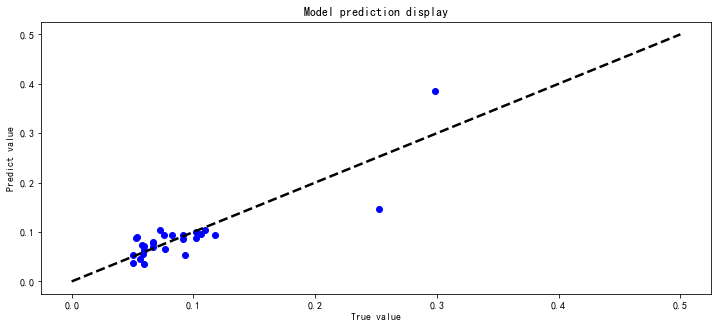

In [26]:
# Drawing linear regression model
plt.figure(figsize = (12, 5))
x_ori = scale_y.inverse_transform(y_test.reshape(-1, 1))
y_ori = scale_y.inverse_transform(y_pred_Linear.reshape(-1, 1))
plt.scatter(x_ori, y_ori, c = 'b')
x = np.linspace(0, 0.5, 10)
plt.plot(x, x, color = 'k', linestyle = '--', linewidth = 2.5)
plt.title('Model prediction display')
plt.xlabel('True value')
plt.ylabel('Predict value')
plt.show()

In [31]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 10000
#      Crime_weight_covid     ： 0.231816
#      lockdown_num           ： 100

X_input = [10000, 0.231816,100]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.08160914692660492520


In [32]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 100000
#      Crime_weight_covid     ： 0.231816
#      lockdown_num           ： 100

X_input = [100000, 0.231816,100]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.08160914692660492520


In [34]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 10000
#      Crime_weight_covid     ： 0.231816
#      lockdown_num           ： 100

X_input = [10000, 0.231816,100]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.08160914692660492520


In [33]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 10000
#      Crime_weight_covid     ： 0.5
#      lockdown_num           ： 100

X_input = [10000, 0.5,100]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.08160914692660492520


In [38]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 10000
#      Crime_weight_covid     ： 0.231816
#      lockdown_num           ： 10

X_input = [10000, 0.231816,10]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.05931197150037671034


In [39]:
#  Using the decision tree model to predict the future data
#      Pop                    ： 10000
#      Crime_weight_covid     ： 0.231816
#      lockdown_num           ： 100

X_input = [10000, 0.231816,100]
x_future = np.array(X_input).reshape(1, -1)
x_future = scale_x.transform(x_future)
y_future_pred = DT_model.predict(x_future.reshape(1, -1))
y_future = scale_y.inverse_transform(y_future_pred.reshape(1, -1))
print ('When input the above forecast data, the predicted crime rate is: %.20f' % y_future)

When input the above forecast data, the predicted crime rate is: 0.08160914692660492520
